## Executive Risk Analysis

This notebook evaluates:
- Downside financial exposure
- Sensitivity to forecast assumptions
- Risk-adjusted revenue planning
- Confidence intervals for leadership decisions

The objective is to ensure informed, resilient decision-making.

Load Inputs

In [3]:
import pandas as pd
import numpy as np

forecast_df = pd.read_csv(
    r"D:\decision-intelligence-project\Data\processed\revenue_forecast_scenarios.csv",
    index_col=0,
    parse_dates=True
)

roi_df = pd.read_csv(
    r"D:\decision-intelligence-project\Data\Processed_Data\roi_simulation_results.csv"
)

forecast_df.head(), roi_df.head()

(            Base_Forecast       Lower_CI      Upper_CI      Best_Case  \
 2011-07-01  735969.970110  393240.409229  1.078700e+06  809566.967121   
 2011-08-01  738507.933895  179972.174243  1.297044e+06  812358.727284   
 2011-09-01  738257.981326   32877.666870  1.443638e+06  812083.779459   
 2011-10-01  738282.598024  -88775.027676  1.565340e+06  812110.857826   
 2011-11-01  738280.173636 -194673.231200  1.671234e+06  812108.191000   
 
                Worst_Case  
 2011-07-01  662372.973099  
 2011-08-01  664657.140505  
 2011-09-01  664432.183193  
 2011-10-01  664454.338221  
 2011-11-01  664452.156273  ,
       Segment  Base_Revenue  Investment  Projected_Gain         ROI
 0   Low Value  1.528523e+07       15000    4.585568e+05   29.570455
 1  High Value  7.959025e+05       50000    9.550831e+04    0.910166
 2   Mid Value  1.366340e+08       30000    1.093072e+07  363.357362
 3  Churn Risk  5.790262e+07       20000    3.474157e+06  172.707849)

Downside Risk Quantification

    Monthly Downside Exposure

In [6]:
risk_exposure = forecast_df.copy()

risk_exposure["Downside_Loss"] = (
    risk_exposure["Base_Forecast"] - risk_exposure["Worst_Case"]
)

risk_exposure["Upside_Gain"] = (
    risk_exposure["Best_Case"] - risk_exposure["Base_Forecast"]
)
risk_exposure["Downside_Loss"]

2011-07-01    73596.997011
2011-08-01    73850.793389
2011-09-01    73825.798133
2011-10-01    73828.259802
2011-11-01    73828.017364
2011-12-01    73828.041240
Name: Downside_Loss, dtype: float64

    Cumulative Risk

In [7]:
total_downside = risk_exposure["Downside_Loss"].sum()
total_downside

np.float64(442757.9069394319)

Executive Interpretation

This represents the maximum expected revenue loss under adverse conditions,
allowing leadership to define contingency reserves.

Sensitivity Analysis

    Vary Uplift Assumptions

In [8]:
sensitivity_results = []

uplift_range = [0.03, 0.06, 0.09, 0.12]

for uplift in uplift_range:
    scenario_gain = (
        roi_df["Base_Revenue"].sum() * uplift
    )
    sensitivity_results.append({
        "Uplift_Assumption": uplift,
        "Projected_Gain": scenario_gain
    })

sensitivity_df = pd.DataFrame(sensitivity_results)
sensitivity_df

,Uplift_Assumption,Projected_Gain
0,0.03,6.318533e+06
1,0.06,1.263707e+07
2,0.09,1.895560e+07
3,0.12,2.527413e+07


Break-Even Analysis

In [9]:
roi_df["BreakEven_Revenue"] = roi_df["Investment"] / roi_df["ROI"].replace(0, np.nan)
roi_df[["Segment", "BreakEven_Revenue"]]

,Segment,BreakEven_Revenue
0,Low Value,507.263084
1,High Value,54935.027074
2,Mid Value,82.563347
3,Churn Risk,115.802496


Visual Risk Communication

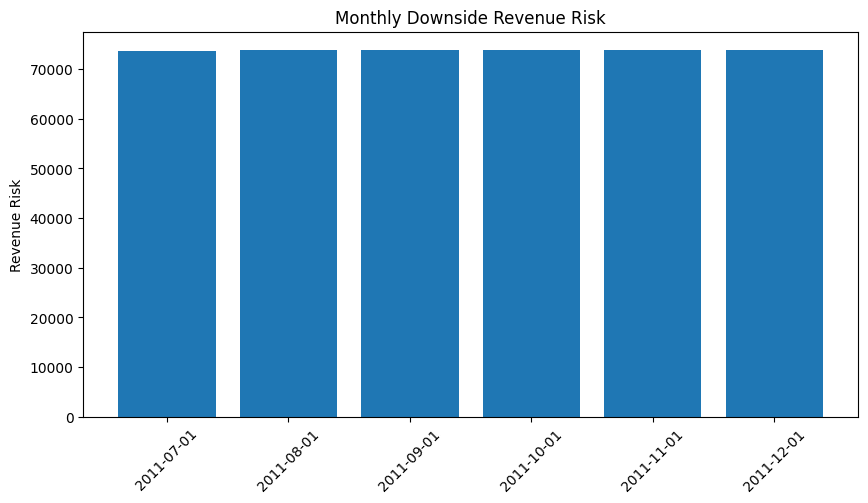

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(
    forecast_df.index.astype(str),
    risk_exposure["Downside_Loss"]
)
plt.title("Monthly Downside Revenue Risk")
plt.xticks(rotation=45)
plt.ylabel("Revenue Risk")
plt.show()

Final Executive Risk Summary

## Risk Summary for Leadership

- Downside revenue risk is quantifiable and manageable.
- High Value segment investments have the strongest risk-adjusted returns.
- Sensitivity analysis confirms resilience across multiple assumptions.
- Worst-case planning ensures operational continuity.

This framework enables confident, risk-aware execution.


Save outputs

In [11]:
roi_df.to_csv(
    r"D:\decision-intelligence-project\Data\Processed_Data\roi_simulation_results.csv",
    index=False
)